# Spectral analysis of resting state brain data

The monkeys were sitting in a dark room, just relaxing, while the brain activity was recorded. Sometimes the monkeys were sleepy and closed their eyes for long periods of time, even falling asleep sometimes.

<img src="monkey_diagram.png" alt="monkey_diagram" height="300"/>
<img src="brain_render.png" alt="brain_render" height="300"/>

The data was thoroughly described, curated, and published in [Chen, Morales-Gregorio et al (2022)](https://www.nature.com/articles/s41597-022-01180-1).

Here we will analyze data from ONE electrode (out of 1024), of the so-called Local Field Potential (LFP). The LFP is the sum of the activity of many neurons around the tip of the electrode, including the activity in the synapses that is created by possibly very far away neurons communicating with the neurons around the electrode.


### Getting started

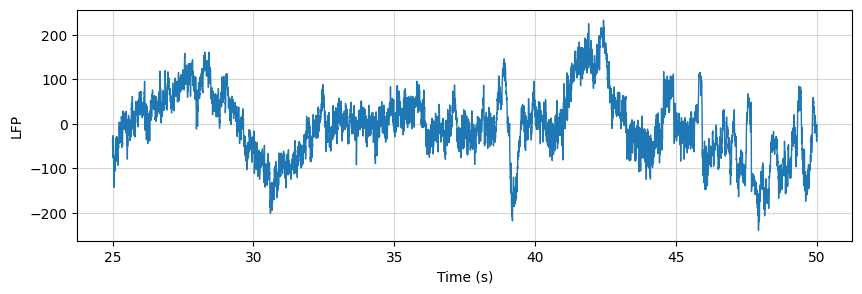

In [1]:
%matplotlib inline

import numpy as np
import scipy
import matplotlib.pyplot as plt

# This loads the data you will need
# It is the Local Field Potential (LFP) from the visual cortex of a macaque monkey
LFP = np.load('macaqueL_V1_elec33_LFP_signal_500Hz.npy')
sampling_rate = 500 # Hz

# Here we plot a snippet of data, so you can see how it looks like
plt.figure(figsize=(10, 3))
plt.plot(np.arange(25, 50, step=1/sampling_rate), LFP[25*sampling_rate:50*sampling_rate], lw=1)
plt.grid(alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('LFP')
plt.show()

In [2]:
def plot_sample(time_from, time_to, df):
    plt.plot(np.arange(time_from, time_to, step=1/sampling_rate), df[time_from * sampling_rate:time_to * sampling_rate], lw=1)
    plt.grid(alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('LFP')
    plt.show()



## Exercise 1: Power Spectrum

Take a 5 second long sample from the LFP signal, it does not matter from which part, as long as it is continuous.

Calculate the power spectrum in two ways:
1. Using `Numpy`'s implementation of the Fast Fourier Transform.
    * HINT: you will need `np.fft.fft` and `np.fft.fftfreq`
2. Using `SciPy`'s implementation of Welch's method.
    * HINT: you will need `scipy.signal.welch`.

Plot your results (frequency against power), you can use a logarithmic scale in the power axis to visualize smaller features. 

Questions:
* What features do you notice in the power spectra? Why do you think it looks like that?
* Do the two approaches give you the same result? Why?
* EXTRA: Can you make the two approaches produce (qualitatively) similar results?

In [3]:
# Take a sample of 5 seconds
sample = LFP[0:5*sampling_rate]

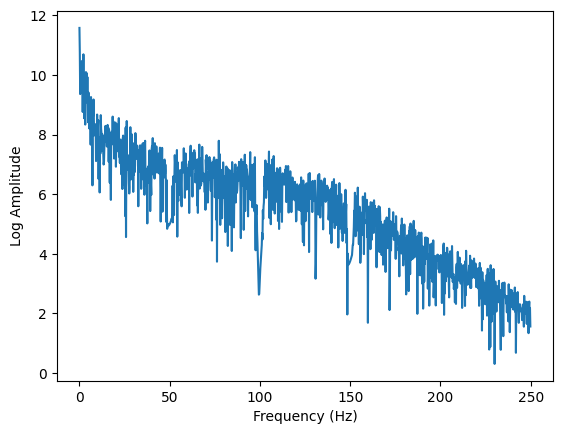

In [4]:
# Calculate the spectral power using Numpy method
fft_result = np.fft.fft(sample)
amplitude = np.abs(fft_result)
phase = np.angle(fft_result)
freqs = np.fft.fftfreq(sample.shape[0], d=1/sampling_rate)

# Plot the spectral power against the frequency
plt.plot(freqs[:len(freqs)//2], np.log(amplitude[:len(amplitude)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Amplitude")
plt.show()


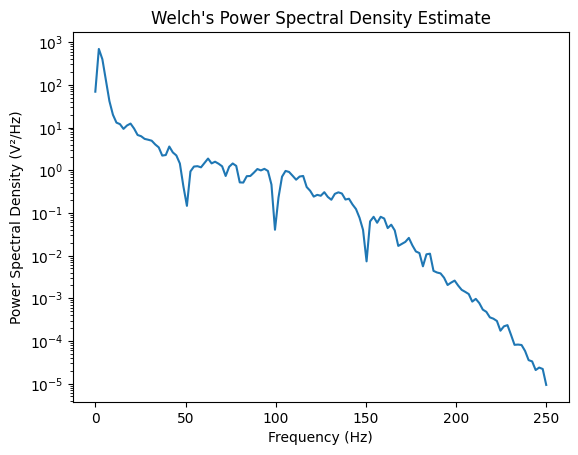

In [6]:
# Calculate the PSD using Welch's method
f, psd = scipy.signal.welch(sample, fs= sampling_rate)

# Plot the PSD against the frequency
plt.semilogy(f, psd)  # semilog-y for better visualization
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title("Welch's Power Spectral Density Estimate")
plt.show()

## Exercise 2: Spectrogram

Let us calculate the spectrogram of the same signal. You can do so by following these steps:
1. Take a sample from the beginning (20 seconds long)
2. Calculate the power spectrum of that sample, store it in a list or array for later use
3. Take another sample starting 1 second later (there will be an overlap of 19 seconds)
4. Calculate the power spectrum, store it
5. Repeat until you reach the end of the signal

You should now have an array that has one column for each second and one row for each frequency.
 
**Part a**
* Calculate the spectrogram as described above
* Plot the spectrogram using `plt.imshow`,
    * HINT: for better visualization some recommended kewords are: `aspect='auto'`, `origin='lower'`, `norm=plt.Normalize(0, 10)`
    * IMPORTANT: Each bin in your spectrogram array is not necessarily 1 second and 1 Hz! You need to set the limits of the plot by setting the keyword `extent = (left, right, bottom, top)`

**Part b**
* For each frequency subtract the mean value over time. This will highlight changes over time of the power at different frequencies. 
* Plot it again.
    * HINT: Focus on the frequencies from 0 to 30 Hz
* What can you see?


**Context**

What you just computed is also called a [Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform). It is very common and powerful for analysing changes of spectral power over time, especially in the slower frequencies.


In [26]:
# Allocate a list in which the spectrogram will be saved
spectrogram = []

# Iterate over time, 
# at each iteration take one slice, calculate the PSD and save it in your list
window = 20 * sampling_rate
for start in range(0, len(LFP) - window, 1 * sampling_rate):
    sample = LFP[start:start + window]
    f, psd = scipy.signal.welch(sample, fs= sampling_rate)
    spectrogram.append(psd)    

# Convert your spectrogram list into an array
spectrogram = np.asanyarray(spectrogram).T

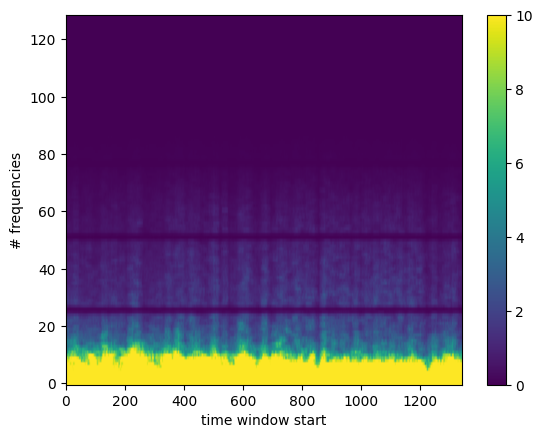

In [33]:
# Plot the spectrogram using imshow
plt.xlabel("time window start")
plt.ylabel("# frequencies")
plt.imshow(spectrogram, aspect='auto', origin='lower', norm=plt.Normalize(0, 10))
plt.colorbar()

(0.0, 30.0)

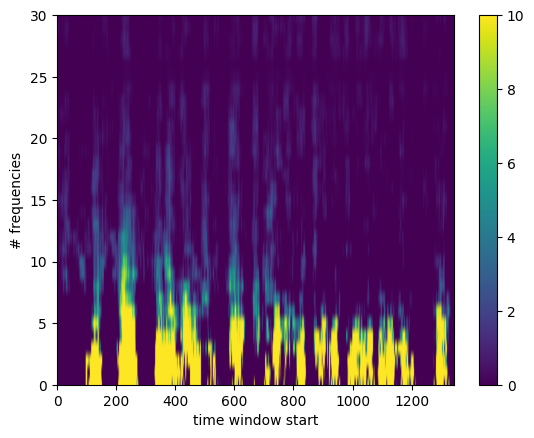

In [36]:
# Remove the mean from each frequency
normalized_spectrogram = (spectrogram.T - spectrogram.mean(axis=1)).T

# Plot the spectrogram again, now without the mean
plt.xlabel("time window start")
plt.ylabel("# frequencies")
plt.imshow(normalized_spectrogram, aspect='auto', origin='lower', norm=plt.Normalize(0, 10))
plt.colorbar()
plt.ylim(0,30)

## Exercise 3: Estimating Brain states

It is well known (since the 1920s) that the power of alpha oscillations (8-12 Hz) is relatively low when the eyes are open, but it dramatically increases when the eyes are closed. 

1. Using the spectrogram, estimate when the monkey had the eyes closed. 
    * In other words, when was the power in 8-12 Hz especially high?
    * HINT: average the power of all frequencies within the band.

Plot your estimated Eyes-Open (EO) and Eyes-Closed (EC). Does it match your expectations?

In [ ]:
# Extract only the alpha frequencies from your spectrogram
# HINT: use the frequencies from the previous part to mask your array
# ... Your code here ...

# Plot the mean alpha power over time
# Plot whether the eyes are open or closed by setting a threshold
# ... Your code here ...

# Overachiever corner

Did you finish all the exercises in record time? Do you want to know more? Here are some extra things to look at.



### Extra exercise 1: Limitations of the power spectrum

What if you want to look at much faster changes of the power spectrum? What happens with the spectrogram as the window sizes get smaller and smaller?

* Test changing the parameters of the window length and size, what do you observe?

In [ ]:
# ... Your code here ...

## The Wavelet transform

For fast changing high frequency events the sliding-window approach we used is not ideal, the resolution that one can get for time and frequency are mutually exclusive. This is known as the Fourier uncertainty principle, higher frequency resolution always leads to lower time resolution and vice versa. This is a conclusion from Heisenberg's uncertainty principle, which is at the core of most of the weirdness in quantum mechanics. 

Another approach to measure a tradeoff between time and frequency is the wavelet transform. One uses a wavelet (a sort of template), which is convolved with the original signal, for varying widths of the same wavelet. This avoids some of the problems from the windowed approach. The most important difference is that the width of the wavelet is varied, this means that for high frequencies shorter wavelets are needed, thus achieving higher temporal resolution. Instead at lower frequencies wider wavelets must be used, increasing frequency resolution at the cost of the time resolution. 

Further theoretical considerations come into play as well, wavelets have full support in both time and frequency domains, because they are defined for a limited time and frequency range. The Fourier transform is only supported from -∞ to ∞, thus taking windows that are shorter required numerical approximations that will inevitably introduce edge effects and potential errors.


Example of a real-valued Morlet wavelet:

![morlet](morlet.png)


### Extra exercise 2: Wavelet transform

Apply the wavelet transform to a piece of data (we recommend it to be from the Eyes-Closed), 5 or 10 seconds should be enough. 

A relatively simple implementation is available in the [elephant toolbox](https://elephant.readthedocs.io). You can install elephant using `pip install elephant`, and then use [`elephant.signal_processing.wavelet_transform`](https://elephant.readthedocs.io/en/latest/reference/_toctree/signal_processing/elephant.signal_processing.wavelet_transform.html#elephant.signal_processing.wavelet_transform). 

Alternatively, the [pywavelets toolbox](https://pywavelets.readthedocs.io/en/latest/index.html) can also be used for this purpose. 

Plot the wavelet transform similarly to how you plotted the spectrogram.

Computing wavelet transforms is computationally more expensive than Fourier transforms, if you do not want you computer to crash do not try to run it on the whole signal.

In [ ]:
# ... Your code here ...